```
import packages you need
```

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

```
import date
```

In [2]:
df_tweet = pd.read_csv("./trump_tweets_df.csv", encoding='unicode_escape')

In [3]:
df_tweet.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,My economic policy speech will be carried live...,False,9214,NaN,2016-08-08 15:20:44,False,NaN,762669882571980801,NaN,"<a href=""http://twitter.com/download/android"" ...",realDonaldTrump,3107,False,False,NaN,NaN
1,"Join me in Fayetteville, North Carolina tomorr...",False,6981,NaN,2016-08-08 13:28:20,False,NaN,762641595439190016,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,2390,False,False,NaN,NaN
2,"#ICYMI: ""Will Media Apologize to Trump?"" https...",False,15724,NaN,2016-08-08 00:05:54,False,NaN,762439658911338496,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,6691,False,False,NaN,NaN
3,"Michael Morell, the lightweight former Acting ...",False,19837,NaN,2016-08-07 23:09:08,False,NaN,762425371874557952,NaN,"<a href=""http://twitter.com/download/android"" ...",realDonaldTrump,6402,False,False,NaN,NaN
4,The media is going crazy. They totally distort...,False,34051,NaN,2016-08-07 21:31:46,False,NaN,762400869858115588,NaN,"<a href=""http://twitter.com/download/android"" ...",realDonaldTrump,11717,False,False,NaN,NaN


In [4]:
df_tweet.shape

(1512, 16)

In [5]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           1512 non-null   object 
 1   favorited      1512 non-null   bool   
 2   favoriteCount  1512 non-null   int64  
 3   replyToSN      3 non-null      object 
 4   created        1512 non-null   object 
 5   truncated      1512 non-null   bool   
 6   replyToSID     0 non-null      float64
 7   id             1512 non-null   int64  
 8   replyToUID     3 non-null      float64
 9   statusSource   1512 non-null   object 
 10  screenName     1512 non-null   object 
 11  retweetCount   1512 non-null   int64  
 12  isRetweet      1512 non-null   bool   
 13  retweeted      1512 non-null   bool   
 14  longitude      5 non-null      float64
 15  latitude       5 non-null      float64
dtypes: bool(4), float64(4), int64(3), object(5)
memory usage: 147.8+ KB


---

```
process of the tweet source
```

In [6]:
df_tweet['statusSource'].value_counts()

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    762
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      628
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      120
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         1
<a href="http://instagram.com" rel="nofollow">Instagram</a>                               1
Name: statusSource, dtype: int64

In [7]:
df_tweet['source'] = df_tweet['statusSource'].apply(lambda x: x.split(" ")[-1])
df_tweet['source'] = df_tweet['source'].apply(lambda x: x.split("</a>")[0])

In [8]:
df_tweet['source'].value_counts()

Android                     762
iPhone                      628
Client                      120
rel="nofollow">Instagram      1
iPad                          1
Name: source, dtype: int64

---

```
convert timezone from native to EST
```

In [9]:
df_tweet['date'] = pd.to_datetime(df_tweet['created']).dt.tz_localize('UTC')
df_tweet['date'] = df_tweet['date'].dt.tz_convert('US/Eastern')
df_tweet['date'] = df_tweet['date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

In [10]:
df_tweet['hour'] = pd.to_datetime(df_tweet['date']).dt.hour

In [11]:
# we only need source of Android and iPhone
tweet_Android = df_tweet[df_tweet['source'] == "Android"]
tweet_iPhone = df_tweet[df_tweet['source'] == "iPhone"]

In [12]:
group_a = tweet_Android[['id', 'hour']].groupby(['hour']).count()
group_i = tweet_iPhone[['id', 'hour']].groupby(['hour']).count()

In [13]:
group_i['pre'] = (group_i['id']/group_i['id'].sum())*100
group_a['pre'] = (group_a['id']/group_a['id'].sum())*100

In [14]:
plt.style.use('default')
# plt.style.use('ggplot')

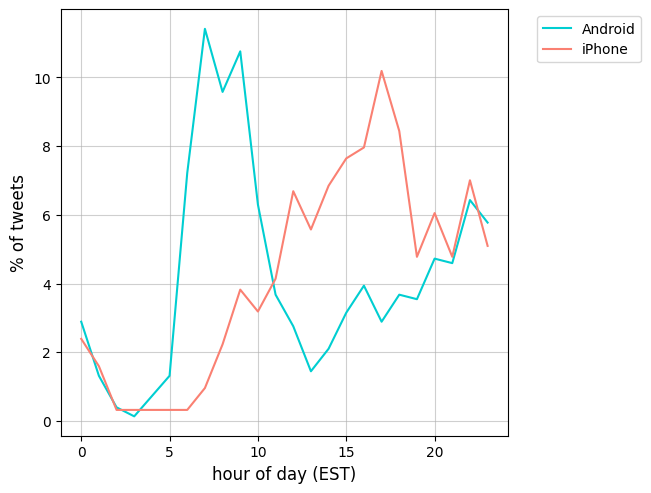

In [15]:
# fig = plt.figure(figsize=(8, 6))
plt.plot(group_a.index, group_a['pre'], c='darkturquoise', label="Android")
plt.plot(group_i.index, group_i['pre'], c='salmon', label="iPhone")

plt.grid(True, alpha=0.6)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.title("Use Python's 'dt.tz_convert' function", fontsize=14)
plt.xlabel("hour of day (EST)",fontsize=12)
plt.ylabel("% of tweets",fontsize=12)
plt.show()

---

```
Different EST convert between Python and R.
```

In [16]:
tweet_r = df_tweet.copy()
tweet_r['est_date'] = pd.to_datetime(df_tweet['created']) - timedelta(hours=5)

In [17]:
tweet_r['hour'] = tweet_r['est_date'].dt.hour

In [18]:
tweet_r_a = tweet_r[tweet_r['source'] == "Android"]
tweet_r_i = tweet_r[tweet_r['source'] == "iPhone"]

In [19]:
group_r_a = tweet_r_a[['id', 'hour']].groupby(['hour']).count()
group_r_i = tweet_r_i[['id', 'hour']].groupby(['hour']).count()

In [20]:
group_r_a['pre'] = (group_r_a['id']/group_r_a['id'].sum())*100
group_r_i['pre'] = (group_r_i['id']/group_r_i['id'].sum())*100

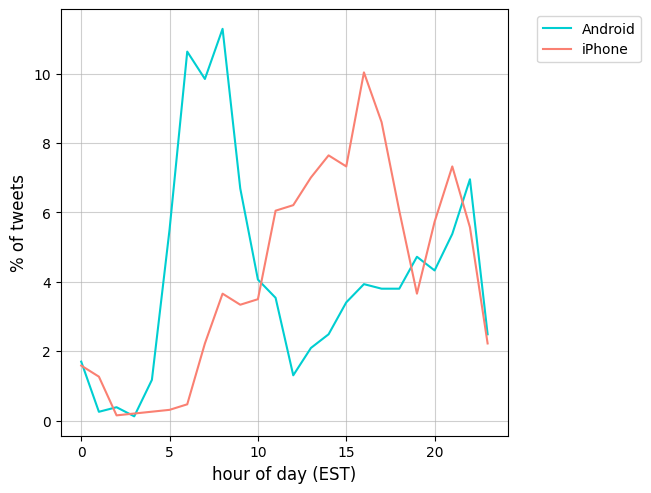

In [21]:
plt.plot(group_r_a.index, group_r_a['pre'], c='darkturquoise', label="Android")
plt.plot(group_r_i.index, group_r_i['pre'], c='salmon', label="iPhone")

plt.grid(True, alpha=0.6)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title("Use R's 'with_tz' function", fontsize=14)
plt.xlabel("hour of day (EST)",fontsize=12)
plt.ylabel("% of tweets",fontsize=12)
plt.show()

---

```
 you can see the difference EST convert between Python and R.
```

In [22]:
tweet_r[['created', 'date', 'est_date', 'source']]

,created,date,est_date,source
0,2016-08-08 15:20:44,2016-08-08 11:20:44,2016-08-08 10:20:44,Android
1,2016-08-08 13:28:20,2016-08-08 09:28:20,2016-08-08 08:28:20,iPhone
2,2016-08-08 00:05:54,2016-08-07 20:05:54,2016-08-07 19:05:54,iPhone
3,2016-08-07 23:09:08,2016-08-07 19:09:08,2016-08-07 18:09:08,Android
4,2016-08-07 21:31:46,2016-08-07 17:31:46,2016-08-07 16:31:46,Android
...,...,...,...,...
1507,2015-12-20 08:21:23,2015-12-20 03:21:23,2015-12-20 03:21:23,Android
1508,2015-12-20 05:25:13,2015-12-20 00:25:13,2015-12-20 00:25:13,Android
1509,2015-12-20 05:11:04,2015-12-20 00:11:04,2015-12-20 00:11:04,Android
1510,2015-12-14 21:11:12,2015-12-14 16:11:12,2015-12-14 16:11:12,iPhone


---

```
Whether tweets start with a quotation mark (")
```

In [23]:
df_tweet['start_quoted'] = df_tweet['text'].apply(lambda x: x.startswith('"'))

In [24]:
df_tweet_f = df_tweet[df_tweet['source'].str.contains("Android|iPhone")]

In [25]:
df_tweet_f.shape

(1390, 20)

In [26]:
# method-1
group_q = df_tweet_f[['start_quoted', 'source', 'id']].groupby(['start_quoted', 'source',]).count()
group_q

id
start_quoted source      
False        Android  553
             iPhone   622
True         Android  209
             iPhone     6

In [27]:
# method-2
quoted_t = df_tweet_f[df_tweet_f['start_quoted'] == True]
quoted_f = df_tweet_f[df_tweet_f['start_quoted'] == False]

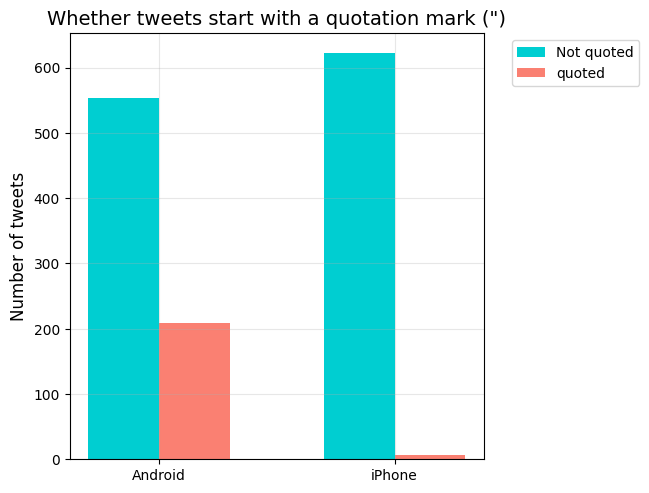

In [28]:
x = np.arange(len(df_tweet_f['source'].unique()))
width = 0.3

# method-1
plt.bar(x, group_q.loc[False, :].squeeze(), width, color='darkturquoise', label="Not quoted")
plt.bar(x+width, group_q.loc[True, :].squeeze(), width, color='salmon', label="quoted")

# method-2
# plt.bar(x, quoted_f['source'].value_counts(sort=False), width, color='darkturquoise',label="Not quoted")
# plt.bar(x+width, quoted_t['source'].value_counts(sort=False), width, color='salmon', label="quoted")

plt.xticks(x+width/2, df_tweet_f['source'].unique(),fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Whether tweets start with a quotation mark (")', fontsize=14)
plt.ylabel("Number of tweets",fontsize=12)

plt.show()